In [144]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def map_labels(labels):
    mapping = {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}
    return [mapping[lbl] for lbl in labels]

imsize = (48, 48)

load data and visualize

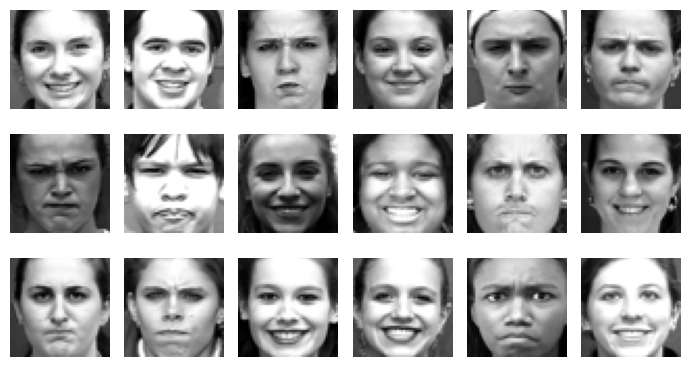

In [145]:
X_train = np.load('dataset/X_train.npy')
y_train = np.load('dataset/y_train.npy')
X_test = np.load('dataset/X_test.npy')
y_test = np.load('dataset/y_test.npy')

fig, axes = plt.subplots(3, 6, figsize=(7, 4))
axes = axes.ravel()
for i in range(3*6):
    im = X_train[i].reshape(imsize)
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

#### Pricipal Components Analysis 

1) learning the principal components

In [148]:
N = len(X_train)
k = 100 # number of principal components to keep

# 1) learn the principal components.
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
B = (X_train - X_mean) / X_std
C = B.T@B / (N-1)
eigenvalues, eigenvectors = np.linalg.eigh(C)
# sort the eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
all_principal_components = eigenvectors[:, sorted_indices]
# keep only first k principal components
principal_components = all_principal_components[:, :k]

# 2) Transform into new basis.
# B = (X_train - X_mean) / X_std
z = B @ principal_components # latent representation $z$

# 3) Reconstructing X_new back from the new basis.
B_recon = z @ principal_components.T
X_recon = B_recon * X_std + X_mean

2) Using the learnt principal components on unseen test data.

In [149]:
# 2) Transform into new basis.
B_test = (X_test - X_mean) / X_std
z_test = B_test @ principal_components # latent representation $z$

# 3) Reconstructing X_new back from the new basis.
B_test_recon = z_test @ principal_components.T
X_test_recon = B_test_recon * X_std + X_mean

In [150]:
happy_rating = [14, 8, 13, 2, 1, 20, 9, 12, 17, 18, 16, 15, 5, 10, 19, 6, 7, 4, 0, 11, 3]

In [151]:
Z = np.zeros((21, 20))
for i, idx_happy in enumerate(happy_rating):
    Z[i, ] = z_test[idx_happy, :20]

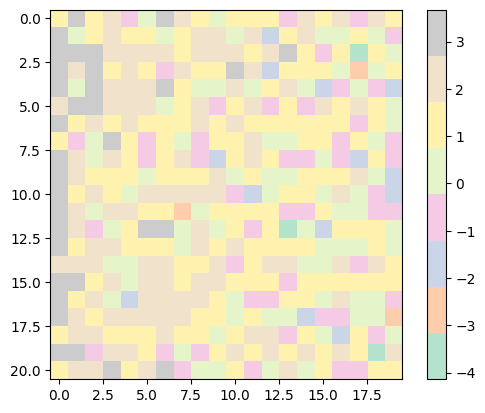

In [152]:
plt.imshow(np.log(np.abs(Z)), cmap='Pastel2')
plt.colorbar()

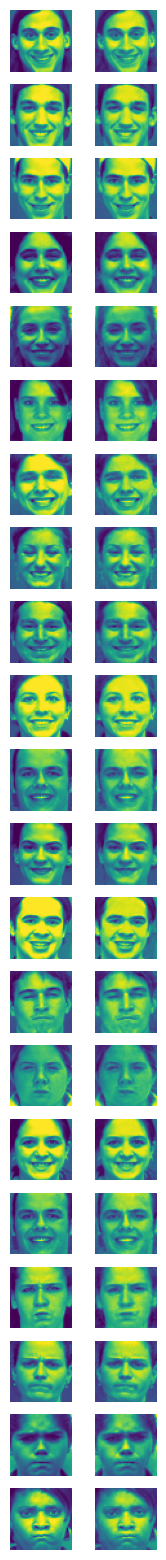

In [154]:
fig, axes = plt.subplots(len(happy_rating), 2, figsize=(2, 20))
for i, idx_happy in enumerate(happy_rating):
    im = X_test[idx_happy].reshape(imsize)
    im_recon = X_test_recon[idx_happy].reshape(imsize)
    axes[i, 0].imshow(im)
    axes[i, 0].axis('off')
    axes[i, 1].imshow(im_recon)
    axes[i, 1].axis('off')

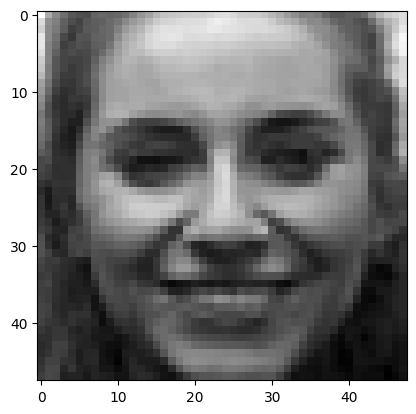

In [ ]:
im = X_test_recon[1].reshape(imsize)
plt.imshow(im, cmap='gray')

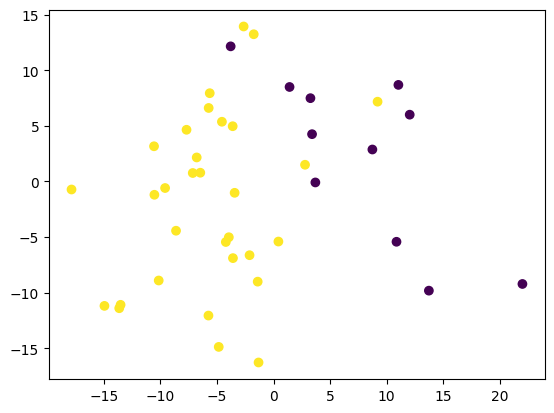

In [ ]:
plt.scatter(z_test[:, 3], z_test[:, 5], c=map_labels(y_test))
plt.show()